In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pandas.tseries.offsets import MonthEnd



In [2]:
Equity_CNN_GOOG = pd.read_csv("/Users/fahad/project_repo/data/final/Equity/CNN/GOOG_CNN_Equity.csv")
Equity_SVM_GOOG = pd.read_csv("/Users/fahad/project_repo/data/final/Equity/SVM/GOOG_SVM_Equity.csv")
Equity_RFC_GOOG =pd.read_csv("/Users/fahad/project_repo/data/final/Equity/RFC/GOOG_RFC_Equity.csv")
Equity_SMA_GOOG = pd.read_csv("/Users/fahad/project_repo/data/final/Equity/Moving_Average/GOOG_Moving_Average_Equity.csv")
Equity_RSI_GOOG = pd.read_csv("/Users/fahad/project_repo/data/final/Equity/RSI/GOOG_RSI_Equity.csv")
Equity_BH_GOOG = pd.read_csv("/Users/fahad/project_repo/data/final/Equity/BH/GOOG_BH_Equity.csv")


In [3]:
Equity_CNN_GOOG.columns = ['Date','Equity']
Equity_SVM_GOOG.columns = ['Date','Equity']
Equity_RFC_GOOG.columns = ['Date','Equity']
Equity_SMA_GOOG.columns = ['Date','Equity']
Equity_RSI_GOOG.columns = ['Date','Equity']
Equity_BH_GOOG.columns = ['Date', 'Equity']


In [4]:
Equity_CNN_GOOG.Date = pd.to_datetime(Equity_CNN_GOOG.Date, format="%Y-%m-%d")
Equity_SVM_GOOG.Date = pd.to_datetime(Equity_SVM_GOOG.Date, format="%Y-%m-%d")
Equity_RFC_GOOG.Date =  pd.to_datetime(Equity_RFC_GOOG.Date, format="%Y-%m-%d")
Equity_SMA_GOOG.Date = pd.to_datetime(Equity_SMA_GOOG.Date, format="%Y-%m-%d")
Equity_RSI_GOOG.Date = pd.to_datetime(Equity_RSI_GOOG.Date, format="%Y-%m-%d")
Equity_BH_GOOG.Date = pd.to_datetime(Equity_BH_GOOG.Date, format="%Y-%m-%d")


In [5]:
def convert_to_monthly(dataframe_obj):
    """takes dataframe which has daily data returns just the months we 
    are interested in"""
    set_of_month_ends = set()
    dataframe_obj.set_index(dataframe_obj.Date)
    list_of_equities = list()
    list_of_dates = list()
    
    #add the month ends present in the dataframe to the set of month ends set obj instantiat
    for index, row in dataframe_obj.iterrows():
        set_of_month_ends.add(row.Date + MonthEnd(0))
    set_of_month_ends = list(set_of_month_ends)
    #sorted list of the month_ends
    set_of_month_ends.sort()
    last_eq = 10000
    for month_end in set_of_month_ends:
        equity = dataframe_obj.loc[dataframe_obj['Date'] == month_end]
#         print ("month_end:%s" % month_end.date())
        if equity.Equity.empty:
            date = month_end.date()
            list_of_dates.append(date)
            list_of_equities.append(last_eq)
        
        else:   
            date = month_end.date()
            
            equity = equity['Equity'].values[0]
            list_of_equities.append(equity)
            list_of_dates.append(date)
            last_eq = equity
            
    return list_of_dates, list_of_equities



    
            
        
    

In [6]:
month_ends_GOOG, eq_list_GOOG = convert_to_monthly(Equity_SMA_GOOG)
Equity_SMA_GOOG = pd.DataFrame(pd.Series(eq_list_GOOG, month_ends_GOOG))
Equity_SMA_GOOG.columns = ['Equity']

In [7]:
month_ends_GOOG, eq_list_GOOG = convert_to_monthly(Equity_RSI_GOOG)
Equity_RSI_GOOG = pd.DataFrame(pd.Series(eq_list_GOOG, month_ends_GOOG))
Equity_RSI_GOOG.columns = ['Equity']

/Users/fahad/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


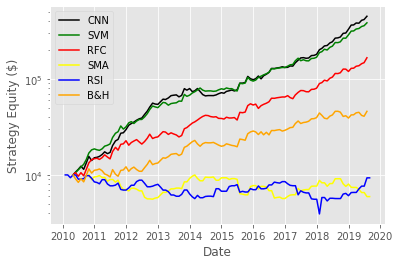

In [8]:
plt.style.use('ggplot')
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.plot(Equity_CNN_GOOG['Date'],Equity_CNN_GOOG['Equity'], color='black', label='CNN')
plt.plot(Equity_SVM_GOOG['Date'],Equity_SVM_GOOG['Equity'], color='green', label='SVM')
plt.plot(Equity_RFC_GOOG['Date'],Equity_RFC_GOOG['Equity'], color='red', label='RFC')
plt.plot(Equity_SMA_GOOG.index, Equity_SMA_GOOG['Equity'], color='yellow', label='SMA')
plt.plot(Equity_RSI_GOOG.index, Equity_RSI_GOOG['Equity'], color='blue', label='RSI')
plt.plot(Equity_BH_GOOG['Date'],Equity_BH_GOOG['Equity'], color ='orange', label='B&H' )
ax.set_yscale('log')
plt.ylabel('Strategy Equity ($)')
plt.xlabel('Date')
plt.legend()